In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

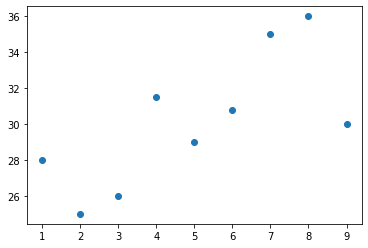

In [2]:
from sklearn.linear_model import LinearRegression

x = np.arange(1, 10)
y = np.array([28, 25, 26, 31.5, 29, 30.8, 35, 36, 30])
plt.scatter(x, y)

In [3]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [4]:
x

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [5]:
y

array([[28. ],
       [25. ],
       [26. ],
       [31.5],
       [29. ],
       [30.8],
       [35. ],
       [36. ],
       [30. ]])

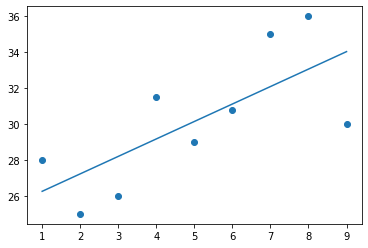

In [6]:
reg = LinearRegression()
reg.fit(x, y)
y_p = reg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_p)

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [8]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

c:\users\admin\pycharmprojects\pythonproject4\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
x = boston.data
y = boston.target

In [10]:
reg2 = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True)  # random_state=42
reg2.fit(x_train, y_train)
y_p_boston = reg2.predict(x_test)

In [11]:
len(x_test)

152

In [12]:
len(y_test)

152

In [13]:
len(y_p_boston)

152

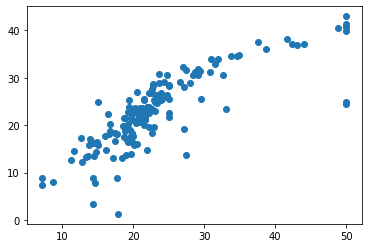

In [14]:
plt.scatter(y_test, y_p_boston)

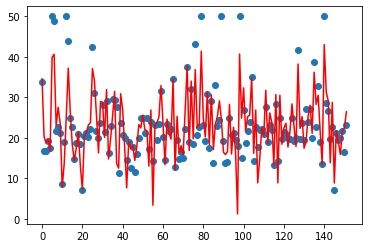

In [15]:
plt.scatter(np.arange(len(x_test)), y_test)
plt.plot(np.arange(len(x_test)), y_p_boston, c='red')

In [16]:
reg2.score(x_test, y_test)

0.658660002268519

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_test, y_p_boston)

25.672630213220007

In [19]:
new_x = boston.data[:, [1, 2, 3]]
new_y = boston.target

In [20]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, train_size=0.7, shuffle=True)
new_reg = LinearRegression()
new_reg.fit(new_x_train, new_y_train)
new_y_predict = new_reg.predict(new_x_test)
new_reg.score(new_x_test,new_y_test)

0.23872365872699985

In [21]:
mean_squared_error(new_y_test, new_y_predict)

76.61809721775863

In [22]:
from sklearn.model_selection import cross_val_score

reg3 = LinearRegression()
c_v_s = cross_val_score(reg3, boston.data, boston.target, cv=5)
c_v_s

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(x, y)

c:\users\admin\pycharmprojects\pythonproject4\venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.1, normalize=True)

In [24]:
lasso_coef = lasso.coef_
lasso_coef

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469455, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795837,  0.        , -0.42817439])

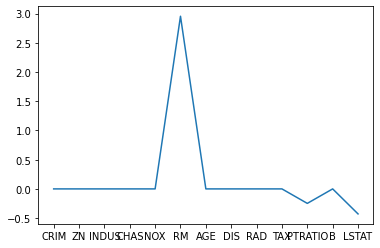

In [25]:
plt.plot(range(13), lasso_coef)
plt.xticks(range(13), boston.feature_names)
plt.show()

c:\users\admin\pycharmprojects\pythonproject4\venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


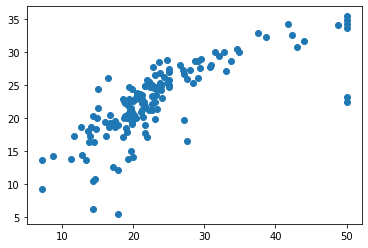

In [26]:
lasso2 = Lasso(alpha=0.1, normalize=True)
lasso2.fit(x_train, y_train)
y_predict = lasso2.predict(x_test)
plt.scatter(y_test,y_predict)

In [27]:
lasso2.score(x_test,y_test)

0.5696929339176573

In [28]:
mean_squared_error(y_test,y_predict)

32.36396044731314

In [29]:
from sklearn.linear_model import Ridge

In [30]:
ridge=Ridge(alpha=0.1,normalize=True)

In [31]:
ridge.fit(x_train,y_train)

c:\users\admin\pycharmprojects\pythonproject4\venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.1, normalize=True)

In [32]:
y_p_ridge=ridge.predict(x_test)

In [33]:
ridge.score(x_test,y_test)

0.655068574174889

In [34]:
mean_squared_error(y_test,y_p_ridge)

25.94274624415073

In [35]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [36]:
boston_df2=pd.DataFrame(boston.data,columns=boston.feature_names)

In [37]:
boston_df2['PRC']=boston.target

In [38]:
boston_df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRC
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


array([[<AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot:xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot:xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot:xlabel='B', ylabel='CRIM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PRC', ylabel='CRIM'>],
       [<AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM

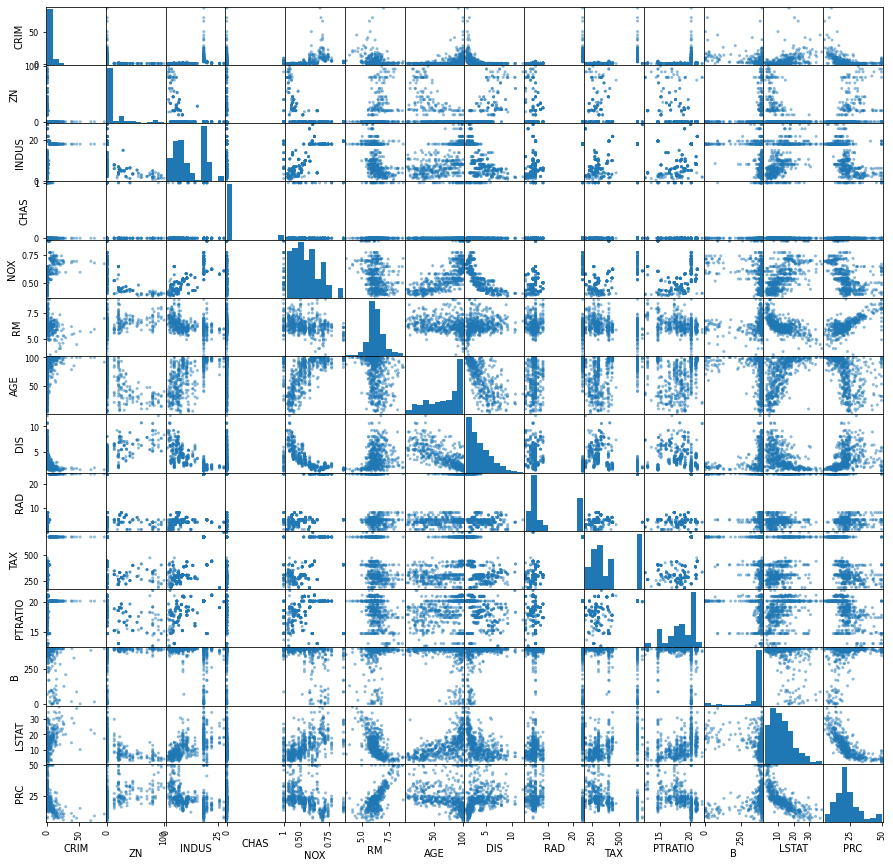

In [39]:
pd.plotting.scatter_matrix(boston_df2,figsize=(15,15))

In [40]:
boston_df2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRC
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


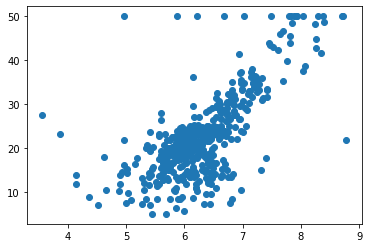

In [41]:
plt.scatter(boston_df2.RM,boston_df2.PRC)

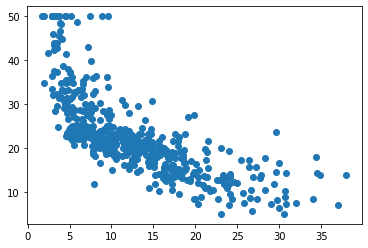

In [42]:
plt.scatter(boston_df2.LSTAT,boston_df2.PRC)